In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import os

In [2]:
num_epochs = 9

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


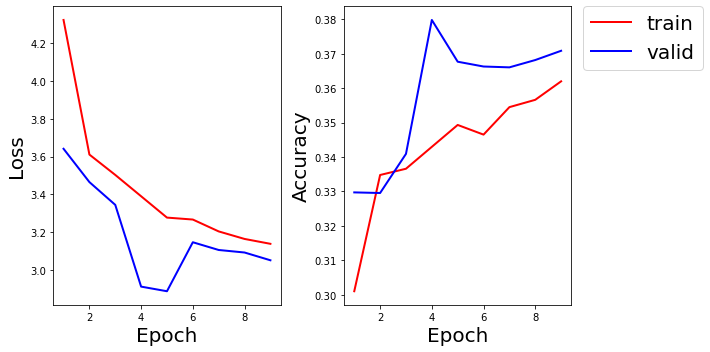

In [3]:
fig = plt.figure(figsize=(10,5))
exp_name = 'exp1'
png_dir = f'./png/{exp_name}'
os.makedirs( png_dir, exist_ok=True )

for phase in ['train', 'valid']:
    
    epoch = []
    loss = []
    acc = []
    
    for i in range(num_epochs):
        
        with open('./logs/{}/{}-log-epoch-{:02d}.txt'.format(exp_name, phase, i+1), 'r') as f:
            df = csv.reader(f, delimiter='\t')
            data = list(df)

        epoch.append(float(data[0][0]))
        loss.append(float(data[0][1]))
        acc.append(float(data[0][3]))

    plt.subplot(1, 2, 1, label='loss')
    if phase == 'train':
        plt.plot(epoch, loss, label = 'train', color = 'red', linewidth = 2.0)
    else:
        plt.plot(epoch, loss, label = 'valid', color = 'blue', linewidth = 2.0)
            
    plt.xlabel('Epoch', fontsize = 20)
    plt.ylabel('Loss', fontsize = 20)
        
    plt.subplot(1, 2, 2, label='acc')
    plt.tight_layout()

    if phase == 'train':
        plt.plot(epoch, acc, label = 'train', color = 'red', linewidth = 2.0)
    else:
        plt.plot(epoch, acc, label = 'valid', color = 'blue', linewidth = 2.0)
    
    plt.xlabel('Epoch', fontsize = 20)
    plt.ylabel('Accuracy', fontsize = 20)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 20})
    
    
# plt.savefig(f'./png/{exp_name}/train.png', dpi = fig.dpi)
plt.show()